# Problem Statement:                                       

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [14]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [15]:
#Checking the shape of dataset
df.shape

(1338, 7)

In [16]:
#Describing the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
#There is huge diffrence in charges max data & 75% data is having huge gap. It shows outliers are present in dataset.
#Looking at the age column, data looks representative of the true age distribution of the adult population Very few people have more than 2 children. 
#75% of the people have 2 or less children

In [18]:
#Checking total of males & females count.

df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
#It shows male & female are almost equal

In [20]:
#Checking how many smokers are available in dataset
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
#Non smoker- 1064 nos & smoker- 274 nos.

In [22]:
#Checking Sex Vs Smoker by using barplot

<AxesSubplot:xlabel='sex', ylabel='count'>

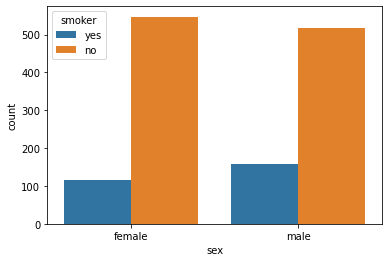

In [23]:
sns.countplot(df["sex"], hue=df["smoker"])

In [24]:
# From above it shows Non smoker are equally destributed in male & female.

In [25]:
#Checking regionwise dataset
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

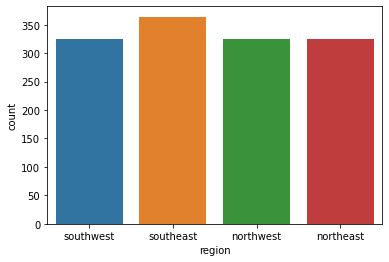

In [26]:
#Lets plot regionwise medical cost
sns.countplot(df["region"])

In [27]:
#The medical cost in southeast region is slitely higher than other regions.
#While other regions medical cost are almost equal

In [28]:
# Checking null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
#From above data it shows there is no null values is present in dataset

In [30]:
#Checking data type of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
# Sex, Smoker, region is object data type.
# So we need to convert object dataset which needs to convert using encoder.
# Others are int & float with no null values.

# Converting object dataset with the help of label encoder technique

In [32]:
lab_enc=LabelEncoder()

In [33]:
df1=lab_enc.fit_transform(df["sex"])
df1


array([0, 1, 1, ..., 0, 0, 0])

In [34]:
# o is for female & 1 is for male

In [35]:
df2=lab_enc.fit_transform(df["smoker"])
df2


array([1, 0, 0, ..., 0, 0, 1])

In [36]:
# 1 is for smoker, 0 is for non smoker

In [37]:
df3=lab_enc.fit_transform(df["region"])
df3

array([3, 2, 2, ..., 2, 3, 1])

In [38]:
#0 :- Northeast
#3 :- Southwest
#2 :- Southeast
#1 :- Northwest

In [39]:
# Fetching the encoding data into the main data set
df['sex']=df1
df["smoker"]=df2
df["region"]=df3

# Creating new dataset

In [40]:
#Now getting new dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [41]:
#We have succefully feed the data using encoding techniques

# EDA

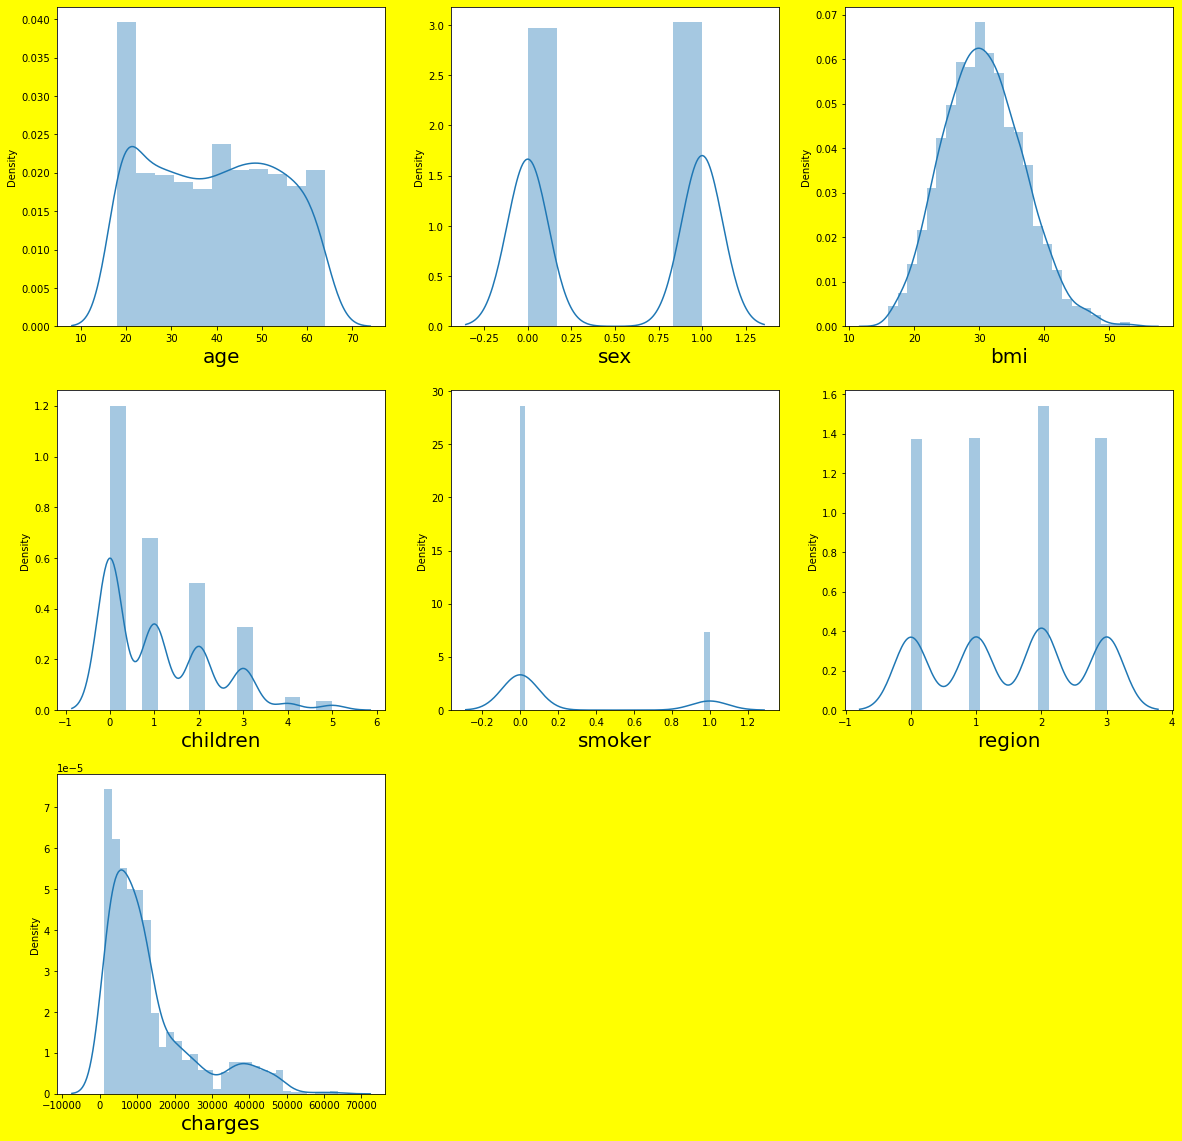

In [42]:
#Lets see how data is destributed for every column
plt.figure(figsize=(20,20), facecolor="yellow")
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1

plt.show()

In [43]:
data_feature=df.drop(["sex", "smoker","region"], axis=1)


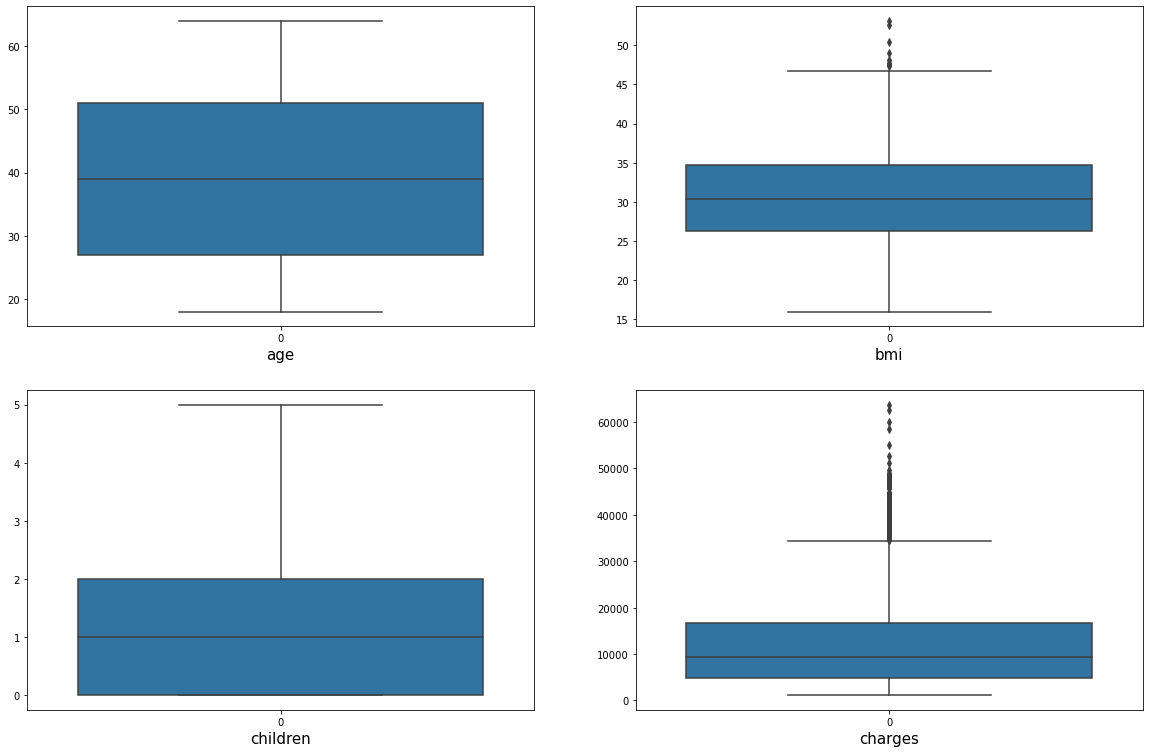

In [44]:
#Finding outliers present in dataset

plt.figure(figsize=(20,20))
graph=1

for column in data_feature:
    if graph<=9:
        plt.subplot(3,2, graph)
        ax=sns.boxplot(data=data_feature[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [45]:
#From above it is observed that age & children does not having outliers.
#Charges is having outliers at maximum side
#bmi is also having outliers.

# hence for normal destribution we need to remove outliers.


# Find the inter quantile range(IQR)

In [46]:
#quantile 1

q1=data_feature.quantile(0.25)

q3=data_feature.quantile(0.75)

IQR=q3-q1

In [47]:
print(q1, q3, IQR)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64 age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64 age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [48]:
#Outliers Detection formulas
#Higher Size= q3+(1.5*IQR)
#Lower size= q1+(1.5*IQR)

bmi_high= (q3.bmi+(1.5*IQR.bmi))
bmi_high

47.290000000000006

In [49]:
#check the indexes which is gteater than 47.29 outlier
index= np.where(df["bmi"] > bmi_high)
index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [50]:
df1= df.drop(df.index[index])
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [51]:
#Also finding the outliers present in charges

charges_high= (q3.charges+(1.5*IQR.charges))
charges_high

34489.350562499996

In [52]:
#check the indexes which is gteater than 34489.35 outlier
index= np.where(df["charges"] > charges_high)
index

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
         203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
         281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
         373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
         530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
         629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
         736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
         850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
         956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
        1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
        1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284,
        1288, 1291, 1300, 1301, 1303, 1313, 1323], dtype=int64),)

In [53]:
#Dropping the high charges index
df1= df.drop(df.index[index])
df1


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [54]:
# Now, finding the shape of dataset
df1.shape

(1199, 7)

In [55]:
# Earlier the shape of data is 1338 nos. of rows & after the removal of outliers from bmi & charges it comes down to 1193 nos.  

In [56]:
#Now, Describing the data
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,0.489575,30.095200,1.084237,0.115096,1.494579,9927.753402
std,14.068040,0.500100,6.010551,1.214304,0.319271,1.109119,7241.158309
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,25.800000,0.000000,0.000000,1.000000,4408.695900
50%,39.000000,0.000000,29.735000,1.000000,0.000000,1.000000,8410.046850
75%,51.000000,1.000000,33.820000,2.000000,0.000000,2.000000,12953.594600
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,34472.841000


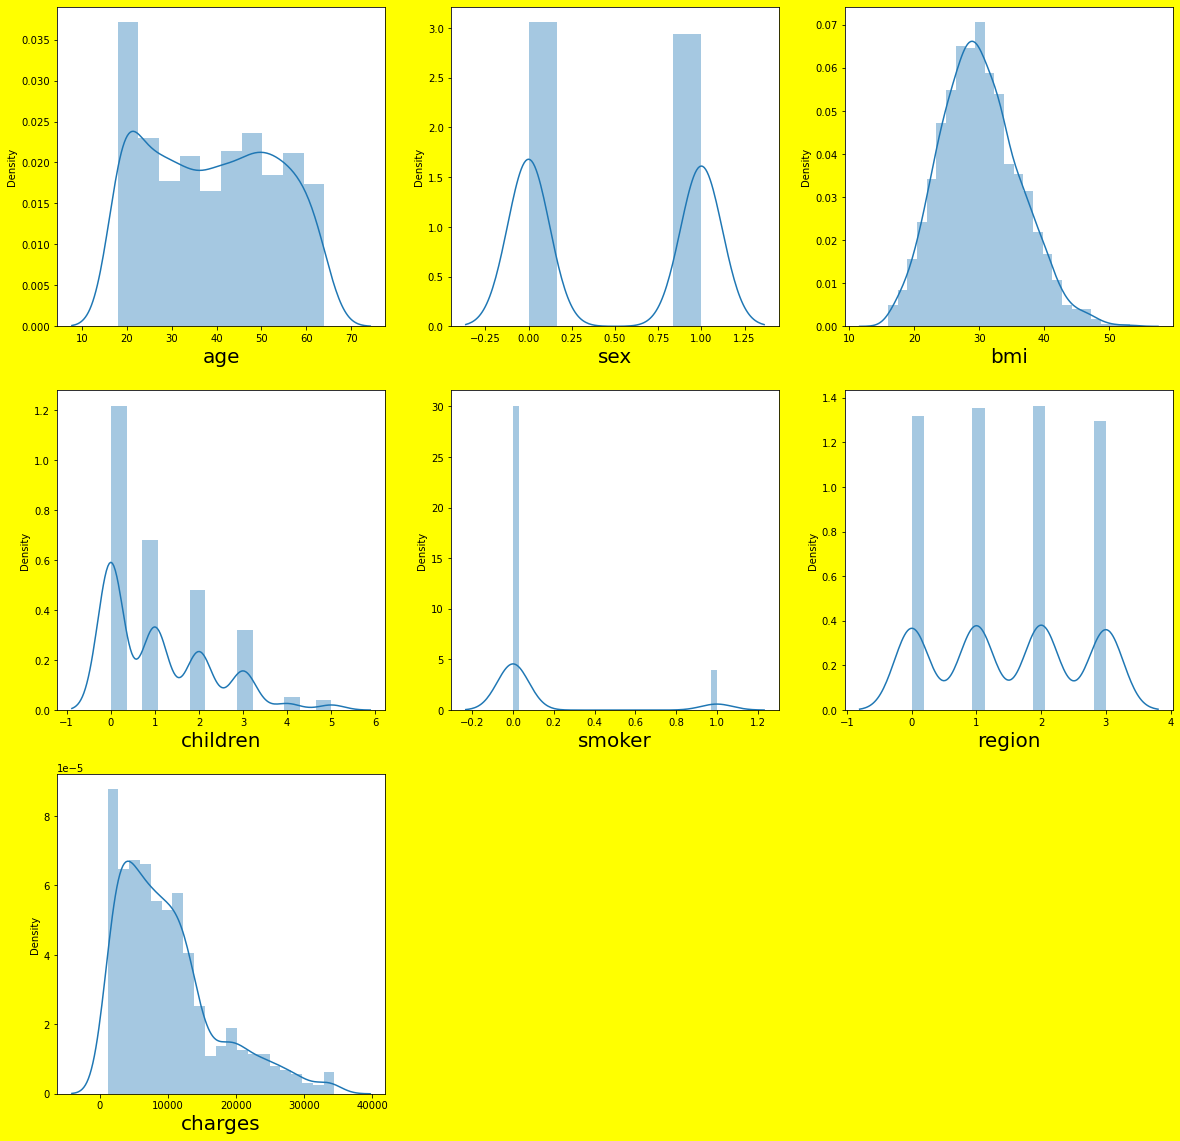

In [57]:
#Lets see how data is destributed for every column after removal of outliers.
plt.figure(figsize=(20,20), facecolor="yellow")
plotnumber=1

for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1

plt.show()

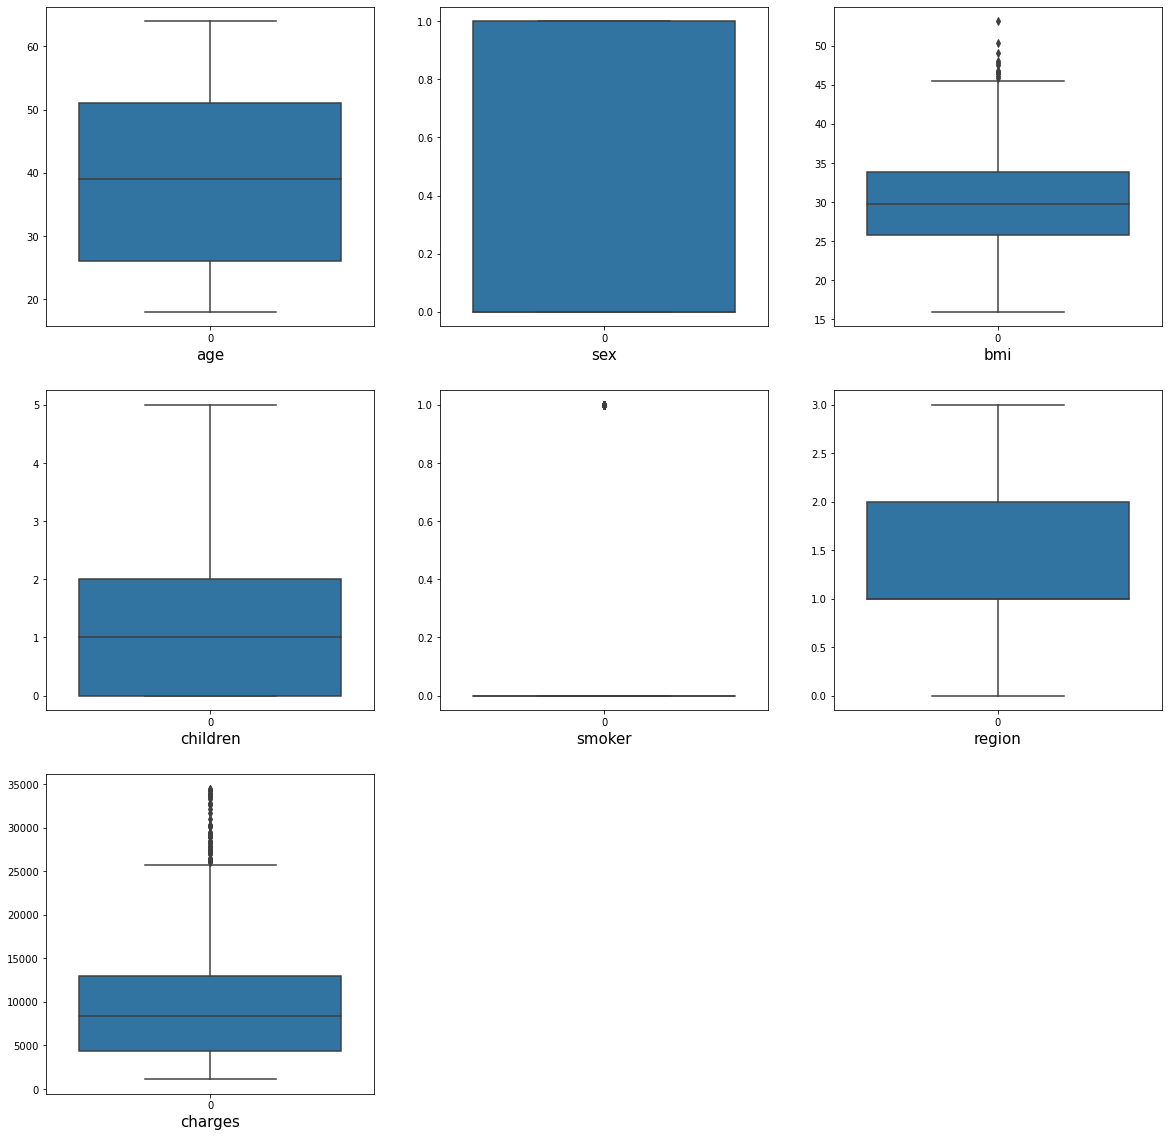

In [58]:
#Finding outliers present in dataset

plt.figure(figsize=(20,20))
graph=1

for column in df1:
    if graph<=9:
        plt.subplot(3,3, graph)
        ax=sns.boxplot(data=df1[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [59]:
#From above we have successfully removed the outliers present in dtaset
x=df1.drop(columns=["charges"],axis=1)
y=df1["charges"]

In [60]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [61]:
x_scaled.shape

(1199, 6)

In [62]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,1.018478,age
1,1.002010,sex
2,1.106679,bmi
3,1.002305,children
4,1.071992,smoker
5,1.024350,region


In [63]:
#As the VIF is less than 5 then it shows there is no multicolinearity. Hence we will proceed for model training.

In [64]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=899)

In [65]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
df1.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [69]:
print("Prd :  ", lr.predict(scalar.transform([[18,0,31.92,0,0,0]])))

Prd :   [3565.23789329]


In [70]:
#Checking training score

lr.score(x_train, y_train)

0.6019541703575302

In [79]:
# WE got 60.19% training score

In [80]:
#Checking testing score

lr.score(x_test, y_test)

0.6094599363619996

In [95]:
#We got testing score :60.94%. So our model accuracy is 60%

In [82]:
#plot to  visualize data
y_pred=lr.predict(x_test)
y_pred

array([14780.36052233,  6865.20504286,  5301.61041178, 12527.41390114,
        7648.39632432, 16798.06698913, 10973.35529237, 10576.8031663 ,
       10899.34077282, 12949.51120903,  8030.72328386,  4308.21858516,
        6143.35063722, 12241.54386584, 10814.11274966, 28096.37131106,
       11679.38040338,  2630.1724538 ,  5203.22040808, 13798.06077417,
        2810.99896464, 11927.47613032,  6013.54398184, 12590.86310754,
        4365.73552621,  6668.14259699,  8283.43255917, 26953.81872302,
        9472.48670492, 26090.686096  , 10247.4963673 ,  5674.81875452,
        4067.7363932 , 12049.17533818,  3783.88027668, 12027.06855262,
        3448.96416482,  2826.44084747, 14375.02645922,  8145.75072535,
        8255.90846858,  9323.15410355,  4785.69484207,  4902.27635276,
        3655.58699885, 21285.47248318,  5343.18455419,  3450.46127595,
        8359.26385979, 13319.3006967 ,  6928.22286328,  2503.30644783,
       12948.4407926 , 11128.19378941,  4844.77883932,  7633.23298118,
      

In [83]:
#Plotting graph of Actual charges vs predicted charges

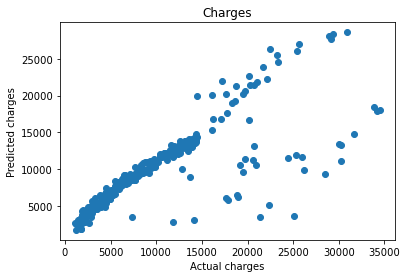

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Charges")
plt.show()

In [ ]:
#Finding the Mean squared error, mean absolute error & root means square erro.

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
y_pred= lr.predict(x_test)

In [87]:
#Mean square error
mean_absolute_error(y_test, y_pred)

2522.97939837165

In [88]:
#MSE
mean_absolute_error(y_test, y_pred)

2522.97939837165

In [89]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

4572.492880382192

In [97]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [96]:
print("Prediction of charges for non smoker:  ", lr.predict(scalar.transform([[50,1,30.97,3,0,1]])))
print("Prediction of charges for smoker :  ", lr.predict(scalar.transform([[50,1,30.97,3,1,1]])))

Prediction of charges for non smoker:   [11839.29805495]
Prediction of charges for smoker :   [26319.11775141]


In [98]:
#By above model we can predict the charges.